# Very naive learning on the vector of surrounding bases with standardish machine learning algorithms from scikit sklearn

---

### Data

Naive feature vectors. The original sequence of validation/test and train data does not overlap! ( but train data points can overlap with train data points, and test-validation can overlap with test-validation data ) This overlapping does not lead to unintentional label leakage!

### Analysis

I will try to naively predict the mehtylation value (0,1) based on naive sequence context feauture vectors.

I will use the "state of the art" general machine learning tools.
- AdaBoost
- RandomForest
- Gradient boosted trees
- SVM


### Conlcusions

- All naive models produce 73-76% prediction rates.
    - actually I think that's surprisinlgy high 
    
    
- Interesting position importance figure with Random Forest.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time

from sklearn import tree
from sklearn import svm
from sklearn import ensemble

import sys
sys.path.append('../my_modules')
from loading_utils import read_my_data

import os,subprocess
workdir='/nagyvinyok/adat84/sotejedlik/ribli/methylation_code/modelling'
subprocess.call(['mkdir',workdir])
os.chdir(workdir)

### Load data

In [2]:
_,train_x,train_y = read_my_data(fname='../prepare_data/big_train_feat_vect.csv')
test_id,test_x,test_y = read_my_data(fname='../prepare_data/big_test_feat_vect.csv')

Loading data... 
Loading data... 


In [6]:
print train_x.shape

(224334, 1000)


In [3]:
def test_sklearn_model(model,train_x,train_y,test_x,test_y):
    start=time.time()
    model=model.fit(train_x,train_y)
    
    train_pred=model.predict(train_x)
    test_pred=model.predict(test_x)
    
    print 'train score:',list((train_pred==train_y)).count(True)/float(len(train_y))
    print 'test score:',list((test_pred==test_y)).count(True)/float(len(test_y))
    print 'It took:',time.time()-start
    
    return train_pred,test_pred

## AdaBoost

- learning rate / n_estimators can be tuned
- more estimators -> better result, and slower

In [4]:
N_train=5000
N_test=5000

adab = ensemble.AdaBoostClassifier(n_estimators=100)
train_pred,test_pred=test_sklearn_model(adab,train_x[:N_train],train_y[:N_train],
                   test_x[:N_test],test_y[:N_test])

train score: 0.7722
test score: 0.694
It took: 17.6778509617


- It gets a bit better using more data

In [11]:
N_train=119000
N_test=10000

adab = ensemble.AdaBoostClassifier(n_estimators=100)
train_pred,test_pred=test_sklearn_model(adab,train_x[:N_train],train_y[:N_train],
                   test_x[:N_test],test_y[:N_test])

train score: 0.716932773109
test score: 0.7046
It took: 626.482781887


- Its already quite slow, but maybe I could test with more estimators

In [23]:
N_train=119000
N_test=10000

adab = ensemble.AdaBoostClassifier(n_estimators=1000)
train_pred,test_pred=test_sklearn_model(adab,train_x[:N_train],train_y[:N_train],
                   test_x[:N_test],test_y[:N_test])

train score: 0.756605042017
test score: 0.7419
It took: 6488.18928885


---

## Random Forest

- n_estimators can be tuned
- the characteristics of the decision trees can be also tuned (min_samples_split)

In [4]:
N_train=20000
N_test=4000

rf = ensemble.RandomForestClassifier(n_estimators=100,min_samples_split=100,n_jobs=12)
train_pred,test_pred=test_sklearn_model(rf,train_x[:N_train],train_y[:N_train],
                   test_x[:N_test],test_y[:N_test])

train score: 0.88315
test score: 0.72275
It took: 2.03022813797


In [7]:
N_train=224000
N_test=10000

rf = ensemble.RandomForestClassifier(n_estimators=100,min_samples_split=100,n_jobs=12)
train_pred,test_pred=test_sklearn_model(rf,train_x[:N_train],train_y[:N_train],
                   test_x[:N_test],test_y[:N_test])

train score: 0.864709821429
test score: 0.7332
It took: 43.5521459579


- With more estimators:

In [16]:
N_train=119000
N_test=10000

rf = ensemble.RandomForestClassifier(n_estimators=1000,min_samples_split=100,n_jobs=12)
train_pred,test_pred=test_sklearn_model(rf,train_x[:N_train],train_y[:N_train],
                   test_x[:N_test],test_y[:N_test])

train score: 0.873915966387
test score: 0.7383
It took: 158.27522397


---

## Gradient boosted trees
- max depth, and n_estimators can be tuned

In [6]:
N_train=5000
N_test=5000

gbc = ensemble.GradientBoostingClassifier(max_depth=3,n_estimators=100)
train_pred,test_pred=test_sklearn_model(gbc,train_x[:N_train],train_y[:N_train],
                   test_x[:N_test],test_y[:N_test])

train score: 0.867
test score: 0.7198
It took: 61.3233318329


- with more data

In [12]:
N_train=119000
N_test=10000

gbc = ensemble.GradientBoostingClassifier(max_depth=4,n_estimators=100)
train_pred,test_pred=test_sklearn_model(gbc,train_x[:N_train],train_y[:N_train],
                   test_x[:N_test],test_y[:N_test])

train score: 0.778151260504
test score: 0.7588
It took: 2124.04033279


- more estimators? I will use also xgboost which is more tunable GB software

---

## Support vector machine

- rbf kernel

- Error penalty can be tuned

- Note it's impossible to interrupt the python kernel when it's running

In [8]:
N_train=5000
N_test=5000

rbf_svm = svm.SVC(kernel='rbf',C=0.3)
train_pred,test_pred=test_sklearn_model(rbf_svm,train_x[:N_train],train_y[:N_train],
                   test_x[:N_test],test_y[:N_test])

train score: 0.8294
test score: 0.7304
It took: 119.257405996


- With more data (really slow)

In [24]:
N_train=119000
N_test=10000

rbf_svm = svm.SVC(kernel='rbf',C=0.3)
train_pred,test_pred=test_sklearn_model(rbf_svm,train_x[:N_train],train_y[:N_train],
                   test_x[:N_test],test_y[:N_test])

train score: 0.795378151261
test score: 0.7373
It took: 32652.5334311


---
## Feature importance with Random Forest

- Very strong asymmetry !

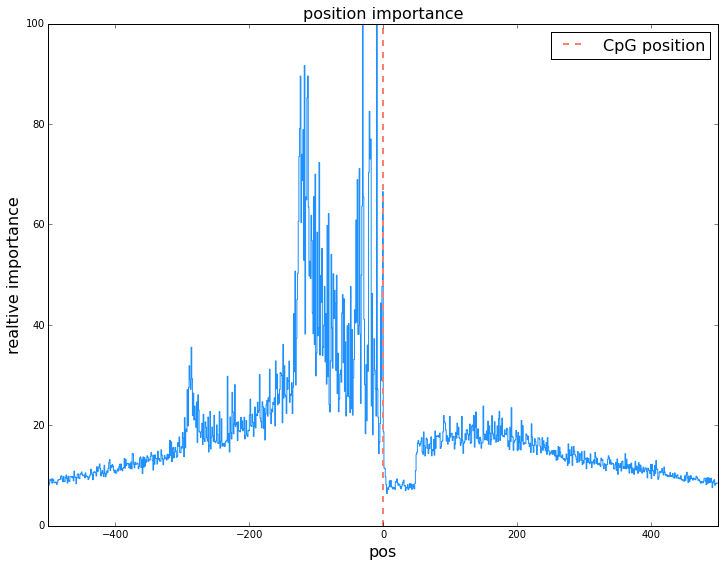

In [9]:
N_train=224000
rf = ensemble.RandomForestClassifier(n_estimators=1000,min_samples_split=100,n_jobs=12)
model=rf.fit(train_x[:N_train],train_y[:N_train])
feature_importance = model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

fig,ax=plt.subplots()
fig.set_size_inches(12,9)
ax.step(np.arange(len(feature_importance))-500, feature_importance,lw=1,c='dodgerblue')
ax.axvline(0,lw=2,linestyle='dashed',c='salmon',label='CpG position')
ax.set_ylabel('realtive importance',fontsize=16)
ax.set_xlabel('pos',fontsize=16)
ax.set_xlim(-500,500)
ax.legend(fontsize=16)
dump=ax.set_title('position importance',fontsize=16)

### Save Random Forest test predictions with ids

In [16]:
N_train=119000
N_test=20000

rf = ensemble.RandomForestClassifier(n_estimators=100,min_samples_split=100,n_jobs=12)
train_pred,test_pred=test_sklearn_model(rf,train_x[:N_train],train_y[:N_train],
                   test_x[:N_test],test_y[:N_test])

train score: 0.868017616702
test score: 0.7348
It took: 14.8952000141


In [24]:
result=pd.DataFrame({'id':test_id,'label':test_y,'prediction':test_pred})
result['error']=np.abs(result['label']-result['prediction'])
result.head()

,id,label,prediction,error
0,cg19752143,1,1,0
1,cg05219517,0,0,0
2,cg05218696,1,1,0
3,cg09329621,1,1,0
4,cg17608706,1,0,1


In [25]:
result.to_csv('rf_test_preds.csv',sep='\t',index=False,Header=True)